<a href="https://colab.research.google.com/github/GabrielFurnielesGarcia/deeplearning/blob/main/Ejercicio%20Regularizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # Descarga los datos de MNIST

In [3]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((-1, 28*28))
test_images = test_images.reshape((-1, 28*28))

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Comprobamos que las transformaciones se han realizado correctamente
print(train_images.shape, max(train_images[0]), min(train_images[0]))

(60000, 784) 1.0 0.0


In [4]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)
split = len(train_images) - 10000

validation_images = train_images[split:]
validation_labels = train_labels[split:]

train_images = train_images[:split]
train_labels = train_labels[:split]

print(split, len(train_images), len(validation_images))

50000 50000 10000


In [30]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado

  model = keras.Sequential()

  if regularizador == 0:
    model.add(keras.layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
  elif regularizador == 1:
    model.add(keras.layers.Dense(512,
                                 activation = 'relu', 
                                 kernel_regularizer = keras.regularizers.l1(0.001), 
                                 input_shape = (28*28,)))
  elif regularizador == 2:
    model.add(keras.layers.Dense(512,
                                 activation = 'relu', 
                                 kernel_regularizer = keras.regularizers.l2(0.001), 
                                 input_shape = (28*28,)))
  elif regularizador == 3:
    model.add(keras.layers.Dense(512,
                                 activation = 'relu', 
                                 kernel_regularizer = keras.regularizers.l1_l2(0.001, 0.001), 
                                 input_shape = (28*28,)))
  elif regularizador == 4:
    model.add(keras.layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
    model.add(keras.layers.Dropout(0.5))
  else:
    print('Regularizador no valido')
    return 0

  model.add(keras.layers.Dense(10, activation = "softmax"))

  print(model.summary())
  return model

In [6]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer='rmsprop',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
  return modelo

In [13]:
def entrena_modelo(modelo, batch_size = 128, epochs = 30):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  return modelo.fit(x=train_images, y=train_labels, batch_size=batch_size, epochs=epochs, validation_data= (validation_images, validation_labels))

In [8]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [9]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [31]:
network0 = crea_modelo(0)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
network0 = compila_modelo(network0)

In [33]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2821 - accuracy: 0.9182 - val_loss: 0.1409 - val_accuracy: 0.9597
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1167 - accuracy: 0.9651 - val_loss: 0.1171 - val_accuracy: 0.9665
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0767 - accuracy: 0.9766 - val_loss: 0.0839 - val_accuracy: 0.9745
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0550 - accuracy: 0.9837 - val_loss: 0.0843 - val_accuracy: 0.9757
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.0777 - val_accuracy: 0.9782
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0305 - accuracy: 0.9912 - val_loss: 0.0710 - val_accuracy: 0.9792
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0235 - accuracy: 0.9927 - val_loss: 0.0747 - val_accuracy: 0.9808
Epoch 

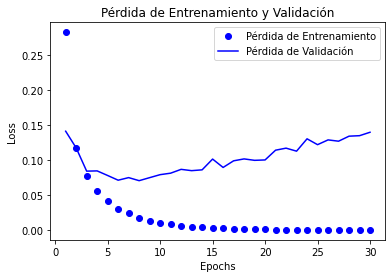

In [34]:
pinta_perdida_entrenamiento_validacion(historia0)

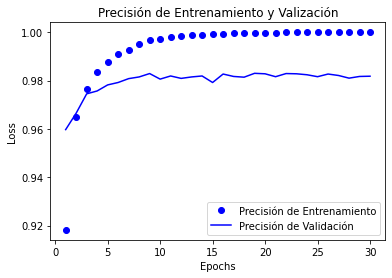

In [35]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [36]:
network1 = crea_modelo(1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
network1 = compila_modelo(network1)

In [38]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1332 - accuracy: 0.8448 - val_loss: 1.0747 - val_accuracy: 0.8674
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.9581 - accuracy: 0.8813 - val_loss: 0.8477 - val_accuracy: 0.9107
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.8314 - accuracy: 0.9023 - val_loss: 0.7946 - val_accuracy: 0.9078
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7577 - accuracy: 0.9150 - val_loss: 0.7487 - val_accuracy: 0.9085
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7095 - accuracy: 0.9230 - val_loss: 0.6730 - val_accuracy: 0.9364
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6721 - accuracy: 0.9304 - val_loss: 0.6378 - val_accuracy: 0.9389
Epoch 7/30
391/391 [==============================] - 2s 6ms/step - loss: 0.6423 - accuracy: 0.9354 - val_loss: 0.6428 - val_accuracy: 0.9384
Epoch 

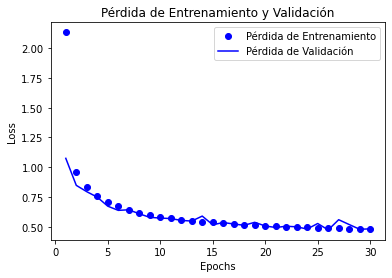

In [39]:
pinta_perdida_entrenamiento_validacion(historia1)

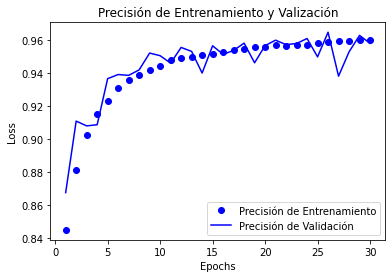

In [40]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [41]:
network2 = crea_modelo(2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
network2 = compila_modelo(network2)

In [43]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5252 - accuracy: 0.9115 - val_loss: 0.3092 - val_accuracy: 0.9517
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.2632 - accuracy: 0.9546 - val_loss: 0.2341 - val_accuracy: 0.9572
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.2089 - accuracy: 0.9636 - val_loss: 0.2041 - val_accuracy: 0.9631
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1863 - accuracy: 0.9671 - val_loss: 0.1741 - val_accuracy: 0.9708
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1732 - accuracy: 0.9694 - val_loss: 0.1903 - val_accuracy: 0.9653
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1643 - accuracy: 0.9713 - val_loss: 0.1851 - val_accuracy: 0.9614
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1570 - accuracy: 0.9727 - val_loss: 0.1735 - val_accuracy: 0.9696
Epoch 

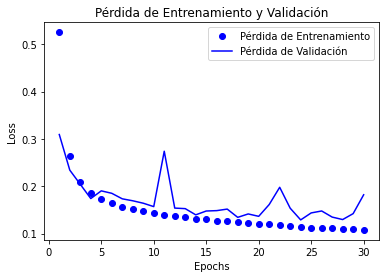

In [44]:
pinta_perdida_entrenamiento_validacion(historia2)

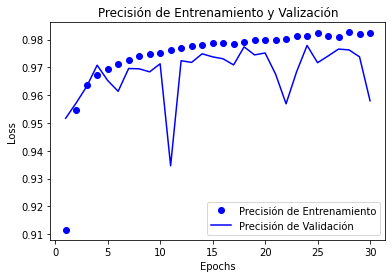

In [45]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [46]:
network3 = crea_modelo(3)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
network3 = compila_modelo(network3)

In [48]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1828 - accuracy: 0.8397 - val_loss: 1.0823 - val_accuracy: 0.8730
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.9828 - accuracy: 0.8774 - val_loss: 0.8471 - val_accuracy: 0.9148
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.8606 - accuracy: 0.8978 - val_loss: 0.7998 - val_accuracy: 0.9126
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7852 - accuracy: 0.9113 - val_loss: 0.7105 - val_accuracy: 0.9301
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7321 - accuracy: 0.9198 - val_loss: 0.6956 - val_accuracy: 0.9324
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 0.9281 - val_loss: 0.6311 - val_accuracy: 0.9465
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6644 - accuracy: 0.9326 - val_loss: 0.6467 - val_accuracy: 0.9357
Epoch 

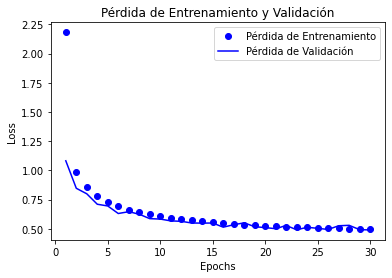

In [49]:
pinta_perdida_entrenamiento_validacion(historia3)

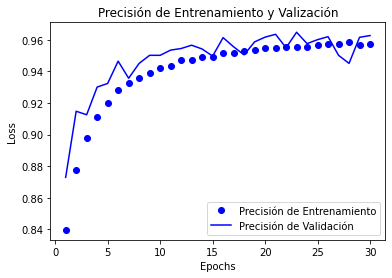

In [50]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [51]:
network4 = crea_modelo(4)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
network4 = compila_modelo(network4)

In [53]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 5ms/step - loss: 0.3473 - accuracy: 0.8975 - val_loss: 0.1546 - val_accuracy: 0.9560
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1679 - accuracy: 0.9504 - val_loss: 0.1198 - val_accuracy: 0.9645
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1273 - accuracy: 0.9626 - val_loss: 0.0990 - val_accuracy: 0.9729
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1068 - accuracy: 0.9682 - val_loss: 0.0907 - val_accuracy: 0.9750
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0913 - accuracy: 0.9736 - val_loss: 0.0856 - val_accuracy: 0.9748
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0822 - accuracy: 0.9754 - val_loss: 0.0785 - val_accuracy: 0.9777
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0754 - accuracy: 0.9771 - val_loss: 0.0756 - val_accuracy: 0.9783
Epoch 

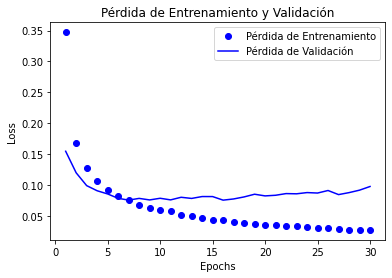

In [54]:
pinta_perdida_entrenamiento_validacion(historia4)

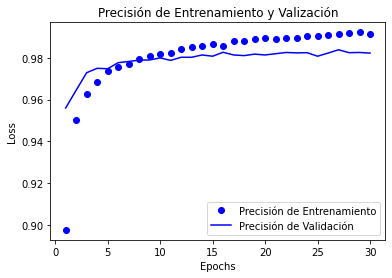

In [55]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [56]:
network5 = crea_modelo(5)

Regularizador no valido


### CONCLUSIONES